In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

In [15]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 324E-9298

 Directory of c:\Drive\Code\Machine Learning - University\Project

03/24/2024  12:21 AM    <DIR>          .
01/17/2024  01:25 PM    <DIR>          ..
02/04/2024  10:19 PM           303,104 .cache.sqlite
02/03/2024  07:05 PM                22 .gitignore
02/06/2024  12:55 AM           137,448 api_data.ipynb
02/25/2024  01:30 AM         1,218,508 API_news.ipynb
02/20/2024  05:04 PM            99,080 ARM.ipynb
02/25/2024  02:47 AM            80,949 ARM_new.ipynb
02/22/2024  10:18 PM         2,212,041 batterynews_raw.csv
02/22/2024  09:43 PM             7,567 cleaned_text.csv
02/29/2024  06:31 PM            64,811 Clustering-hclust.ipynb
03/15/2024  05:28 PM           538,559 Clustering-kmeans.ipynb
02/23/2024  03:26 AM    <DIR>          data
02/06/2024  12:59 AM           138,726 data_cleaning.ipynb
02/06/2024  12:59 AM           284,068 data_gathering.ipynb
03/24/2024  12:20 AM                 0 decision_tree.ipynb
02/2

In [45]:
df = pd.read_excel("data/cleaned_dataset/experiment_data/discharge_df_v8.xlsx")
df

,Unnamed: 0,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,Capacity_category,BL_category
0,0,0.520049,0.546660,0.512312,0.029185,0.630947,High,High
1,1,0.515980,0.533887,0.513283,0.016950,0.649025,High,High
2,2,0.534153,0.503128,0.504372,0.000000,0.696456,Very High,High
3,3,0.523945,0.546950,0.515138,0.029352,0.629428,High,High
4,4,0.521151,0.534160,0.515378,0.017054,0.651638,High,High
...,...,...,...,...,...,...,...,...
2763,2763,0.269417,0.536666,0.170323,0.644356,0.496991,Low,High
2764,2764,0.421894,0.580443,0.121174,0.618864,0.486723,Low,High
2765,2765,0.426326,0.570999,0.103425,0.624224,0.510436,Low,High
2766,2766,0.796225,0.837213,0.024160,0.445565,0.612879,Very Low,Low


In [17]:
df["Capacity_category"].value_counts()

Capacity_category
High         1733
Low           744
Very Low      254
Very High      12
Name: count, dtype: int64

In [46]:
df["BL_category"].value_counts()

BL_category
High         1763
Very High     578
Low           427
Name: count, dtype: int64

In [19]:
# df = pd.read_excel("data/cleaned_dataset/experiment_data/Cluster_data.xlsx")
# df

In [47]:
df

,Unnamed: 0,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,Capacity_category,BL_category
0,0,0.520049,0.546660,0.512312,0.029185,0.630947,High,High
1,1,0.515980,0.533887,0.513283,0.016950,0.649025,High,High
2,2,0.534153,0.503128,0.504372,0.000000,0.696456,Very High,High
3,3,0.523945,0.546950,0.515138,0.029352,0.629428,High,High
4,4,0.521151,0.534160,0.515378,0.017054,0.651638,High,High
...,...,...,...,...,...,...,...,...
2763,2763,0.269417,0.536666,0.170323,0.644356,0.496991,Low,High
2764,2764,0.421894,0.580443,0.121174,0.618864,0.486723,Low,High
2765,2765,0.426326,0.570999,0.103425,0.624224,0.510436,Low,High
2766,2766,0.796225,0.837213,0.024160,0.445565,0.612879,Very Low,Low


In [48]:
df.columns

Index(['Unnamed: 0', 'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',
       'Capacity_category', 'BL_category'],
      dtype='object')

In [50]:
df1 = df[['Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',
       'Capacity_category', 'BL_category']]


In [23]:
df1

,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,Capacity_category,RUL_category
0,0.520049,0.546660,0.512312,0.029185,0.630947,High,High
1,0.515980,0.533887,0.513283,0.016950,0.649025,High,High
2,0.534153,0.503128,0.504372,0.000000,0.696456,Very High,High
3,0.523945,0.546950,0.515138,0.029352,0.629428,High,High
4,0.521151,0.534160,0.515378,0.017054,0.651638,High,High
...,...,...,...,...,...,...,...
2763,0.269417,0.536666,0.170323,0.644356,0.496991,Low,High
2764,0.421894,0.580443,0.121174,0.618864,0.486723,Low,High
2765,0.426326,0.570999,0.103425,0.624224,0.510436,Low,High
2766,0.796225,0.837213,0.024160,0.445565,0.612879,Low,High


In [51]:
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is your DataFrame containing the data
# Assuming 'BL_category' is your target variable
target = df1['BL_category']
capacity = df1["Capacity_category"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target variable
target_encoded = label_encoder.fit_transform(target)
capacity_encoded = label_encoder.fit_transform(capacity)

# Replace the original 'BL_category' column with the encoded values
df1['BL_category_encoded'] = target_encoded
df1['Capacity_category_encoded'] = capacity_encoded


# Display the encoded target variable
display(df1)

,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,Capacity_category,BL_category,BL_category_encoded,Capacity_category_encoded
0,0.520049,0.546660,0.512312,0.029185,0.630947,High,High,0,0
1,0.515980,0.533887,0.513283,0.016950,0.649025,High,High,0,0
2,0.534153,0.503128,0.504372,0.000000,0.696456,Very High,High,0,2
3,0.523945,0.546950,0.515138,0.029352,0.629428,High,High,0,0
4,0.521151,0.534160,0.515378,0.017054,0.651638,High,High,0,0
...,...,...,...,...,...,...,...,...,...
2763,0.269417,0.536666,0.170323,0.644356,0.496991,Low,High,0,1
2764,0.421894,0.580443,0.121174,0.618864,0.486723,Low,High,0,1
2765,0.426326,0.570999,0.103425,0.624224,0.510436,Low,High,0,1
2766,0.796225,0.837213,0.024160,0.445565,0.612879,Very Low,Low,1,3


In [52]:
df1[['Voltage_measured_mean', 'Current_measured_mean',
          'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',"Capacity_category_encoded",'BL_category_encoded']]

,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,Capacity_category_encoded,BL_category_encoded
0,0.520049,0.546660,0.512312,0.029185,0.630947,0,0
1,0.515980,0.533887,0.513283,0.016950,0.649025,0,0
2,0.534153,0.503128,0.504372,0.000000,0.696456,2,0
3,0.523945,0.546950,0.515138,0.029352,0.629428,0,0
4,0.521151,0.534160,0.515378,0.017054,0.651638,0,0
...,...,...,...,...,...,...,...
2763,0.269417,0.536666,0.170323,0.644356,0.496991,1,0
2764,0.421894,0.580443,0.121174,0.618864,0.486723,1,0
2765,0.426326,0.570999,0.103425,0.624224,0.510436,1,0
2766,0.796225,0.837213,0.024160,0.445565,0.612879,3,1


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming df1 is your DataFrame containing the data
X = df1[['Voltage_measured_mean', 'Current_measured_mean',
          'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',"Capacity_category_encoded"]]
y = df1['BL_category_encoded']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7003610108303249


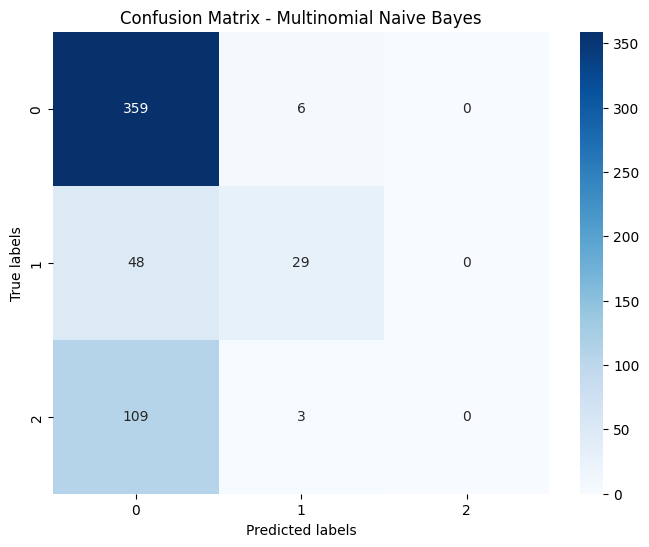

In [54]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [55]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create and train the Multinomial Naive Bayes classifier with class weights
clf = MultinomialNB(class_prior=class_weights)
clf.fit(X_train, y_train)

MultinomialNB(class_prior=array([0.527897  , 2.10857143, 1.58369099]))

In [56]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.33574007220216606


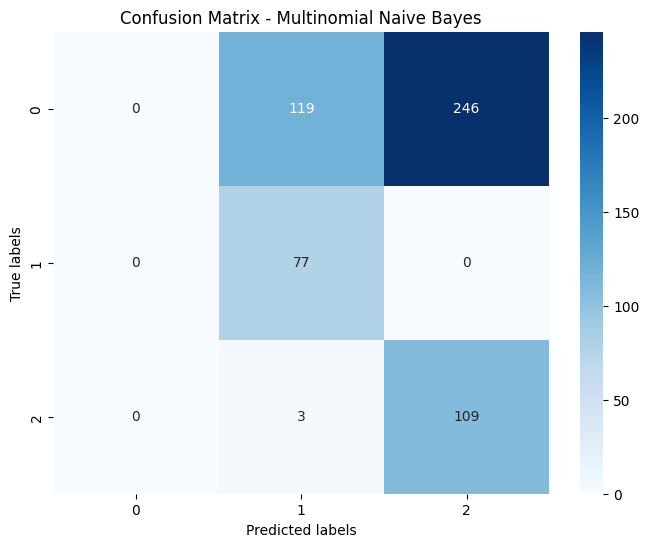

In [57]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

SMOTE

Accuracy: 0.6353790613718412


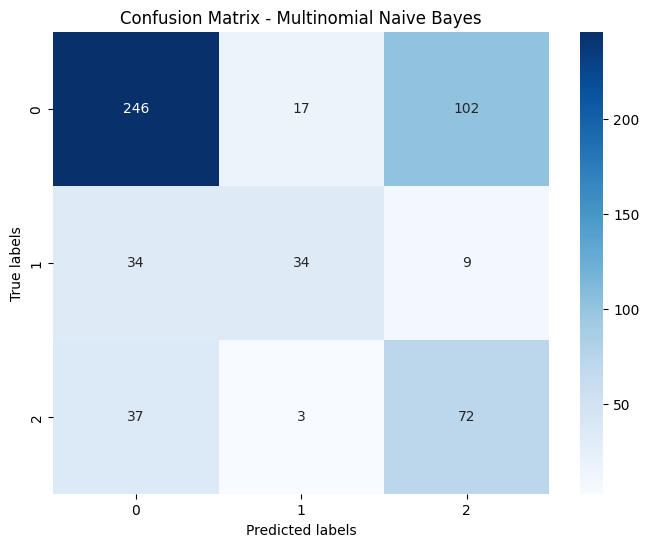

In [58]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

Accuracy: 0.9638989169675091


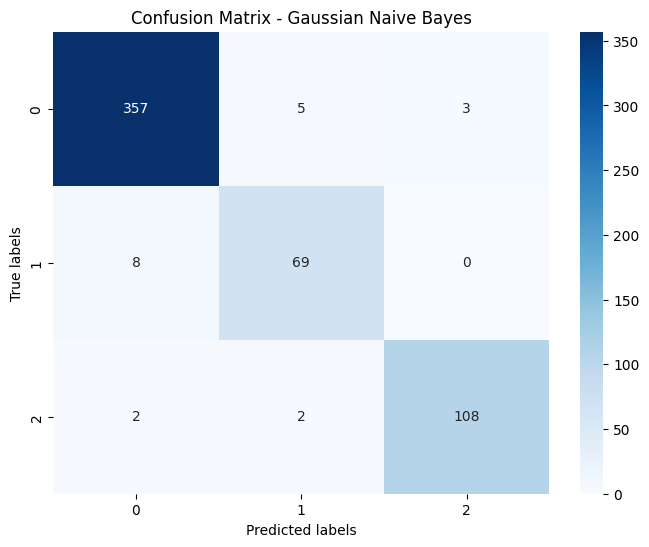

In [64]:
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

Decision Tree

Accuracy: 0.983754512635379


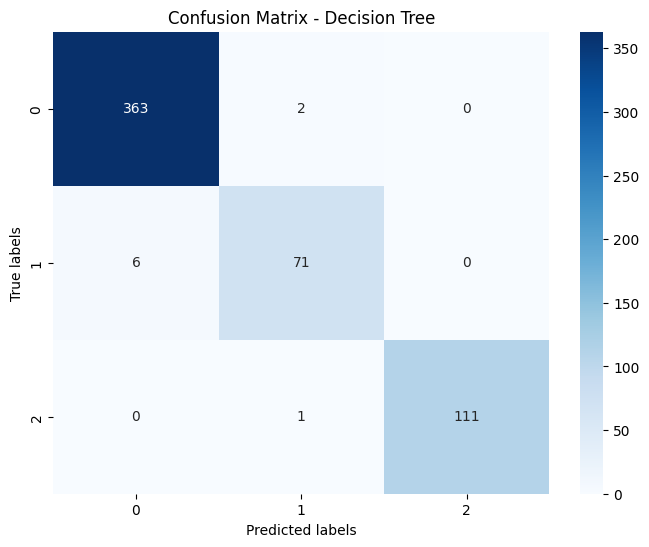

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Criteria options: 'gini', 'entropy'
criteria = 'gini'  # Change this to 'entropy' for information gain criterion

# Initialize Decision Tree classifier with specified criteria
dt_classifier = DecisionTreeClassifier(criterion=criteria)

# Train the classifier on the training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test) 



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

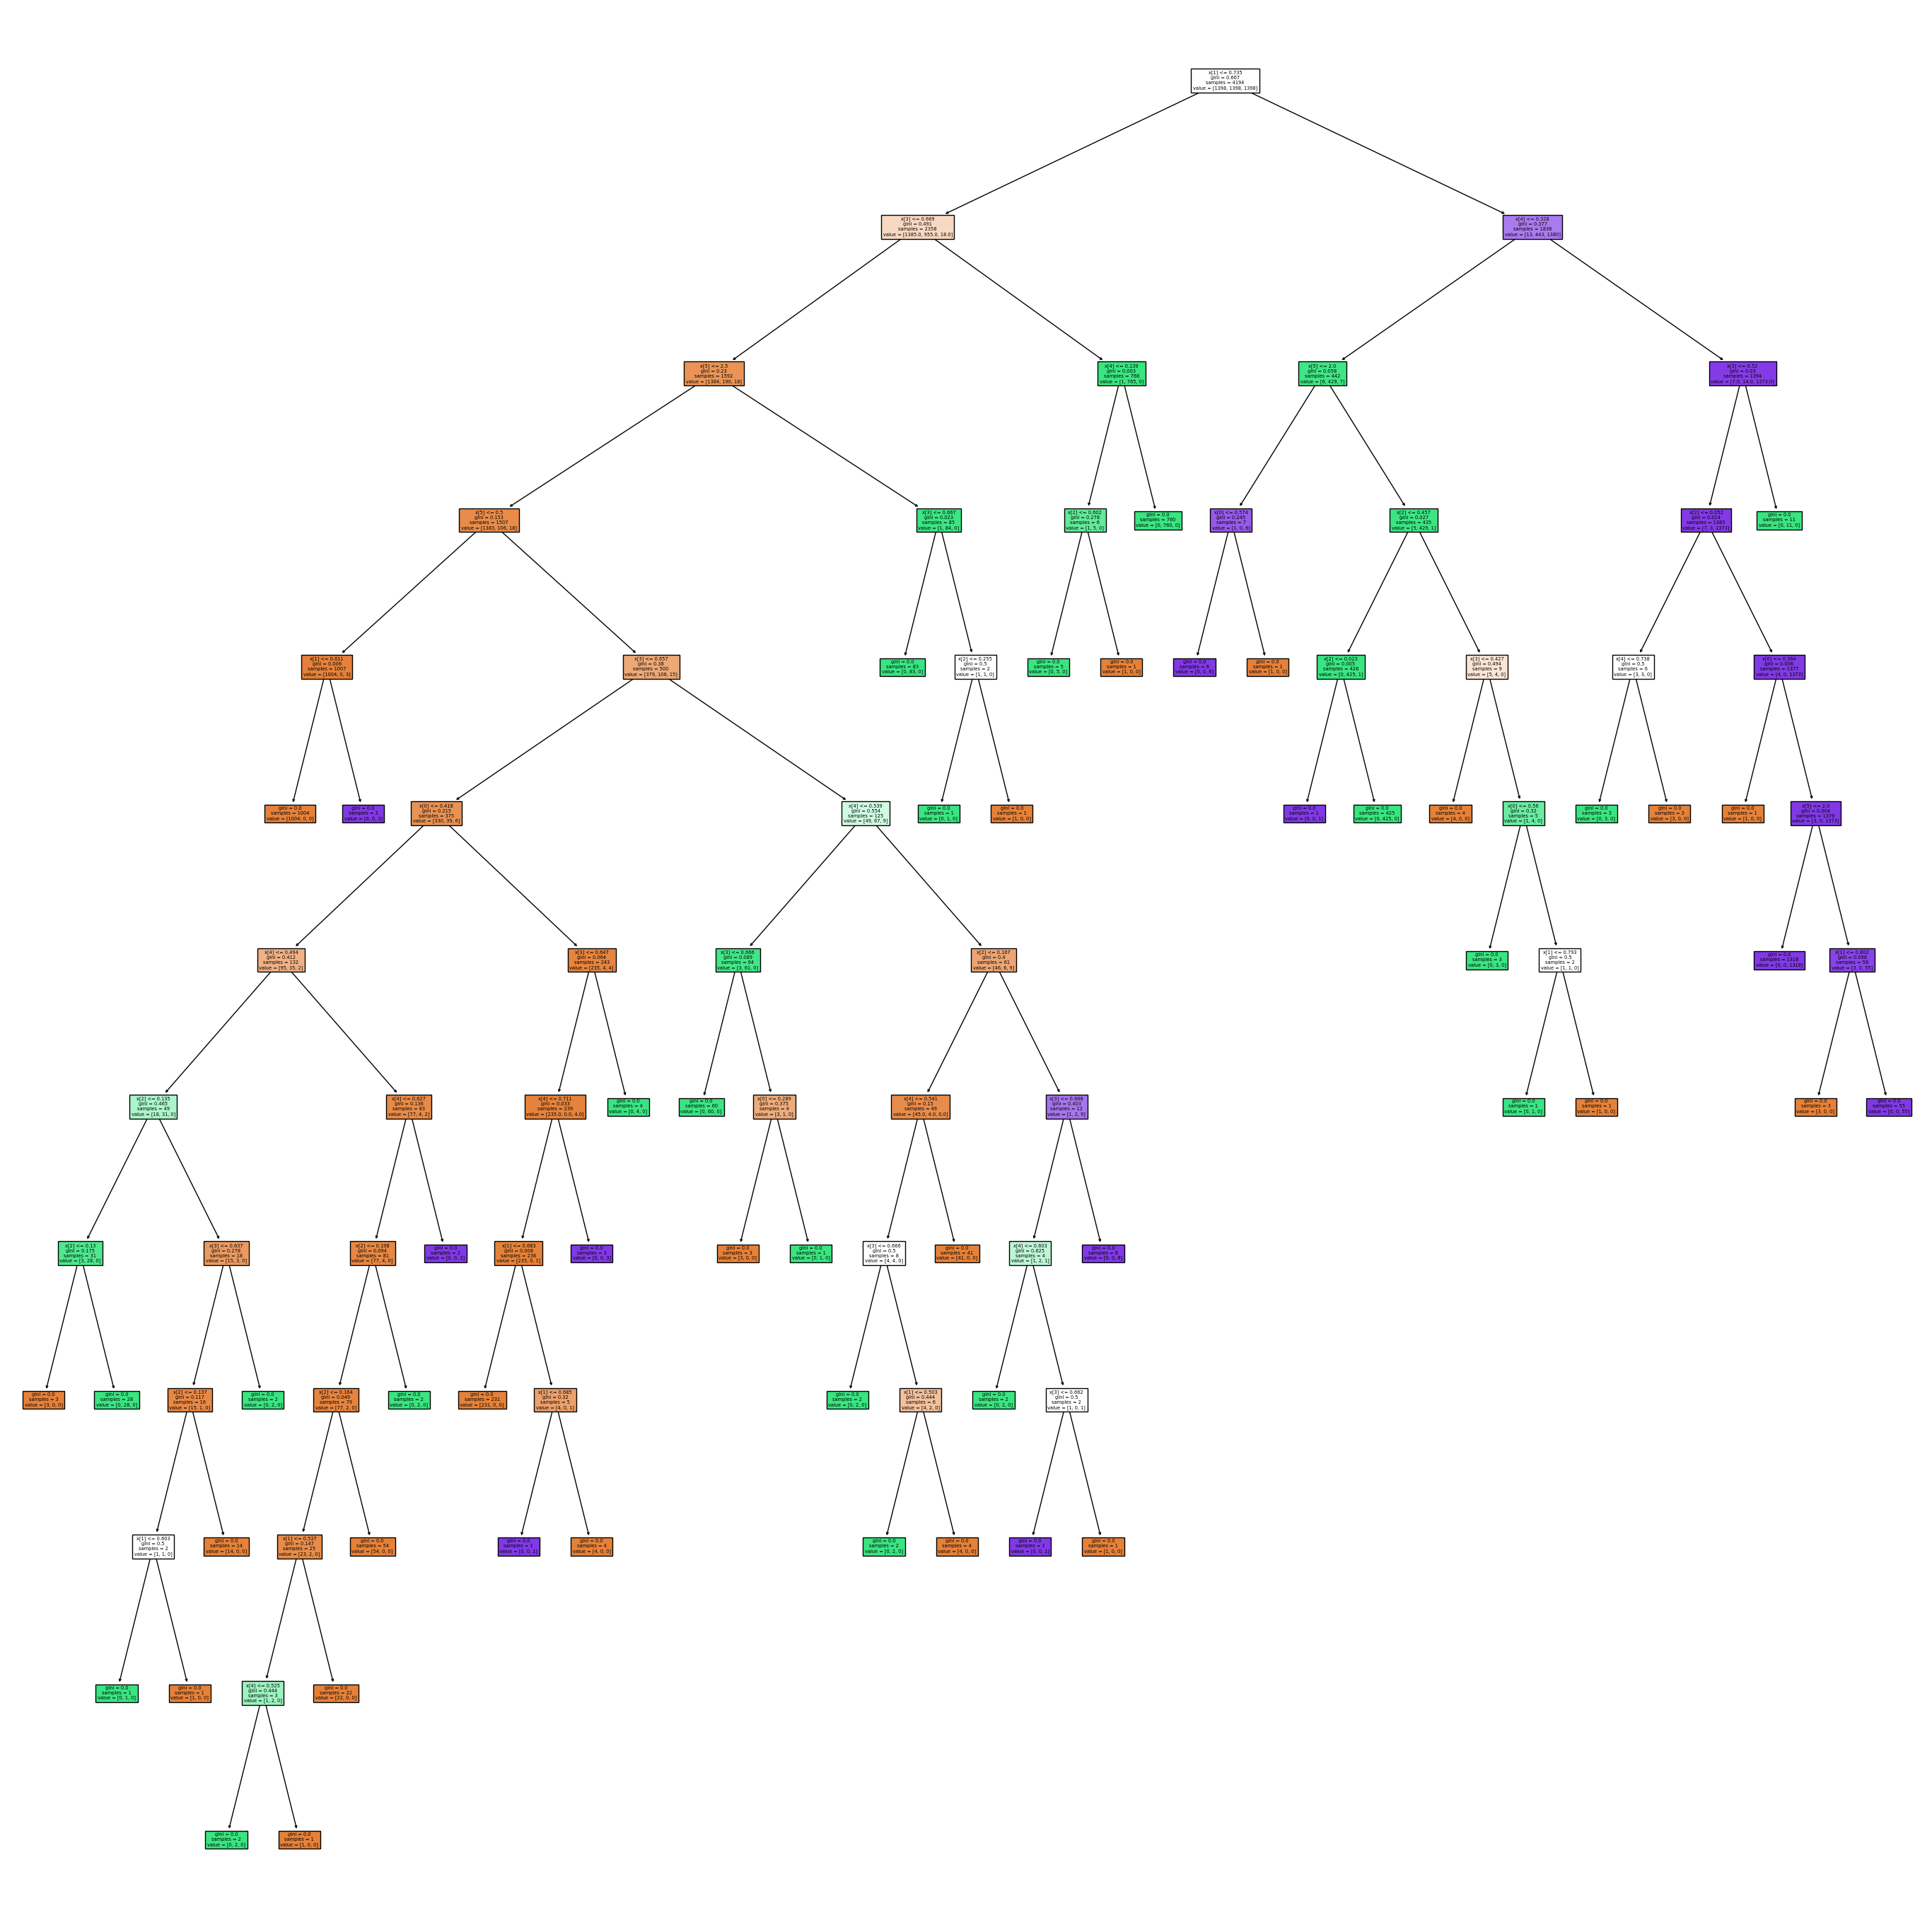

In [66]:
plt.figure(figsize=(35, 35))
plot_tree(dt_classifier,filled=True)
plt.show()

Accuracy: 0.9620938628158845


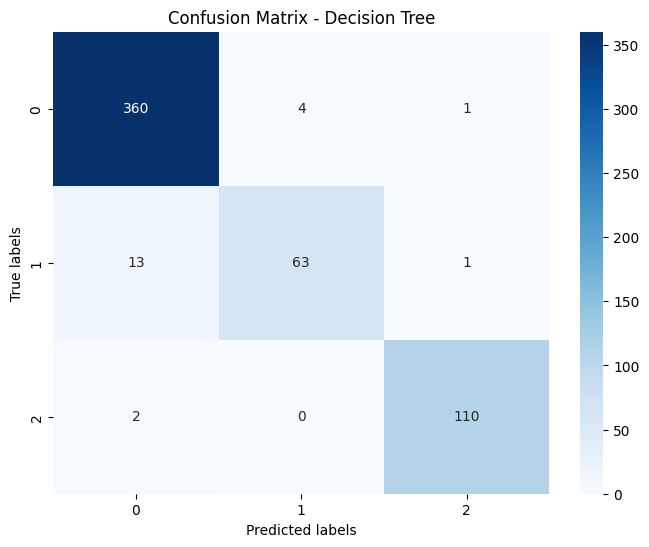

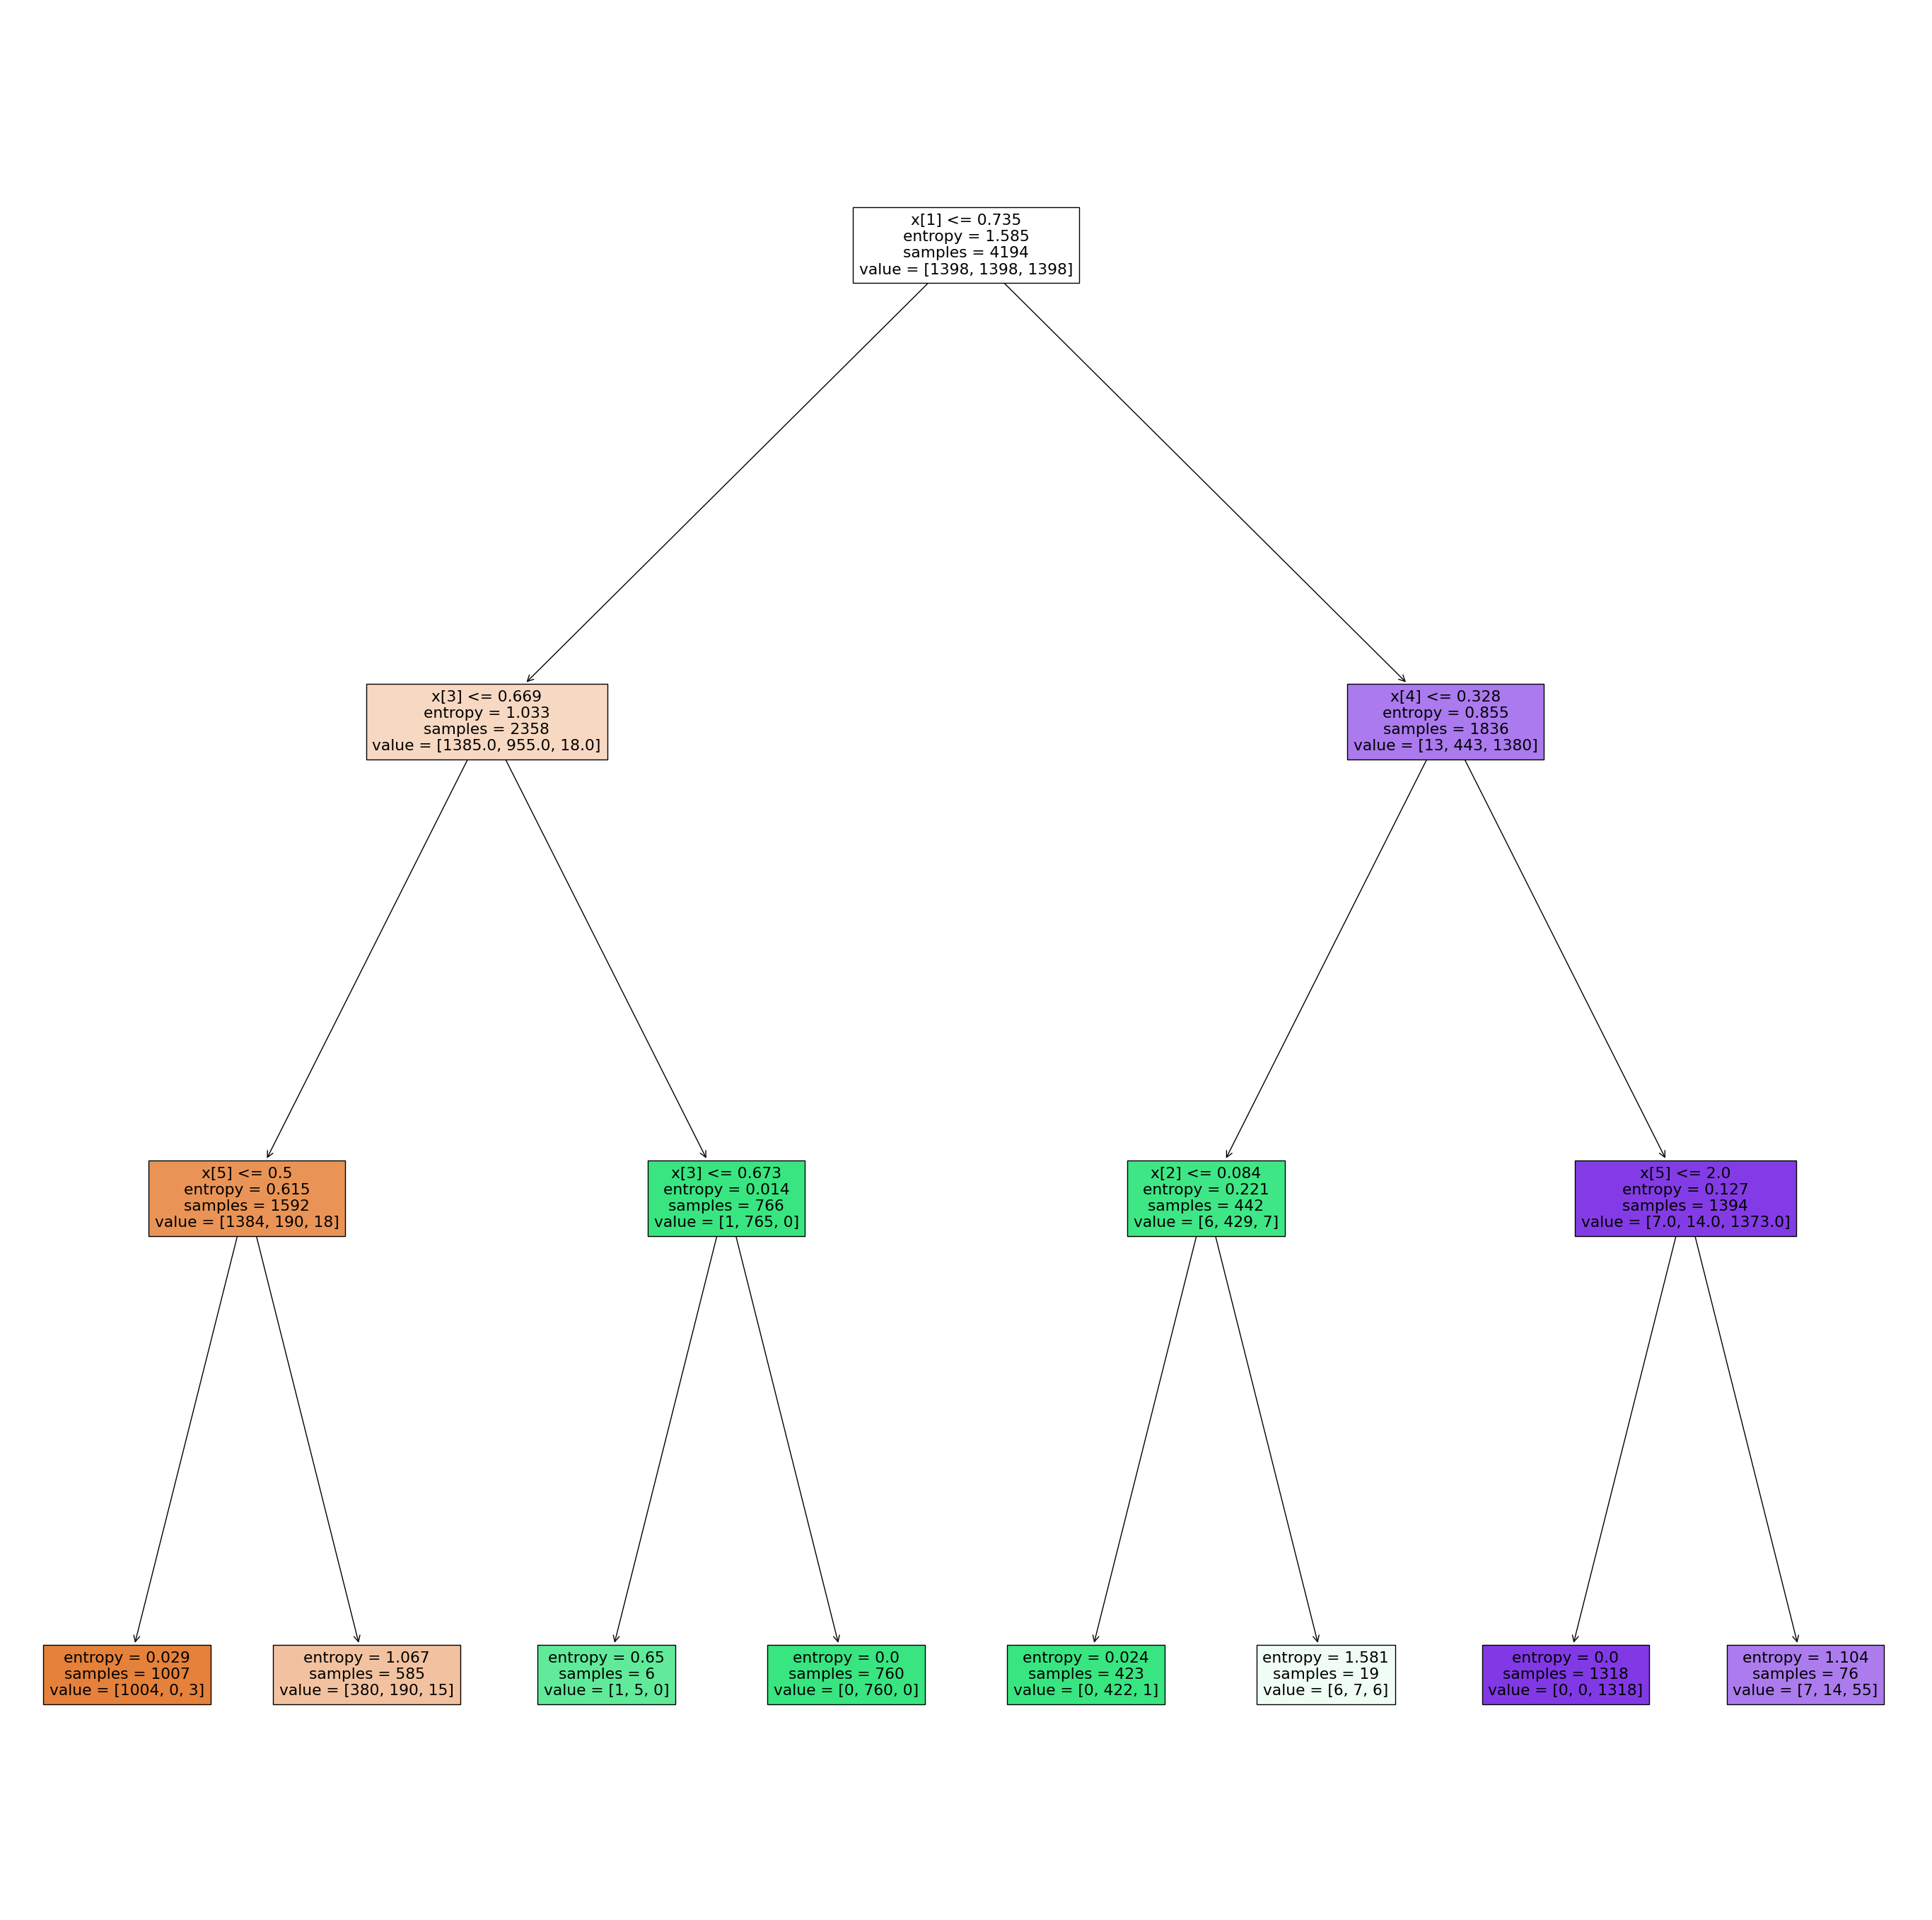

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Criteria options: 'gini', 'entropy'
criteria = 'entropy'  # Change this to 'entropy' for information gain criterion

# Initialize Decision Tree classifier with specified criteria
dt_classifier = DecisionTreeClassifier(criterion=criteria,max_depth=3)

# Train the classifier on the training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test) 



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

plt.figure(figsize=(35, 35))
plot_tree(dt_classifier,filled=True)
plt.show()

Accuracy: 0.9350180505415162


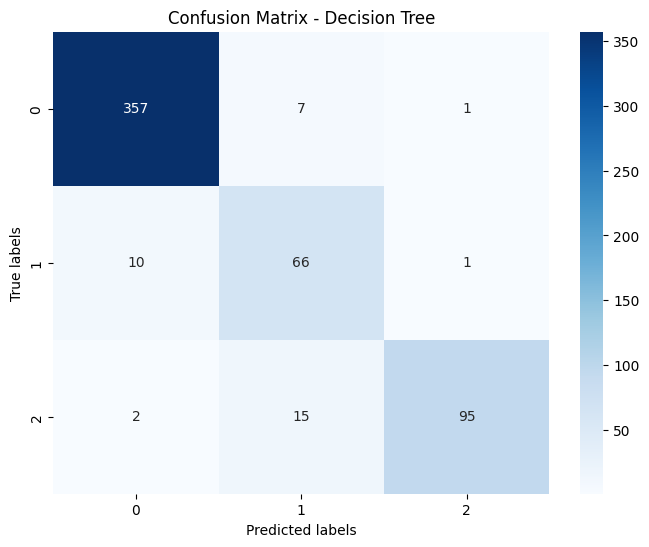

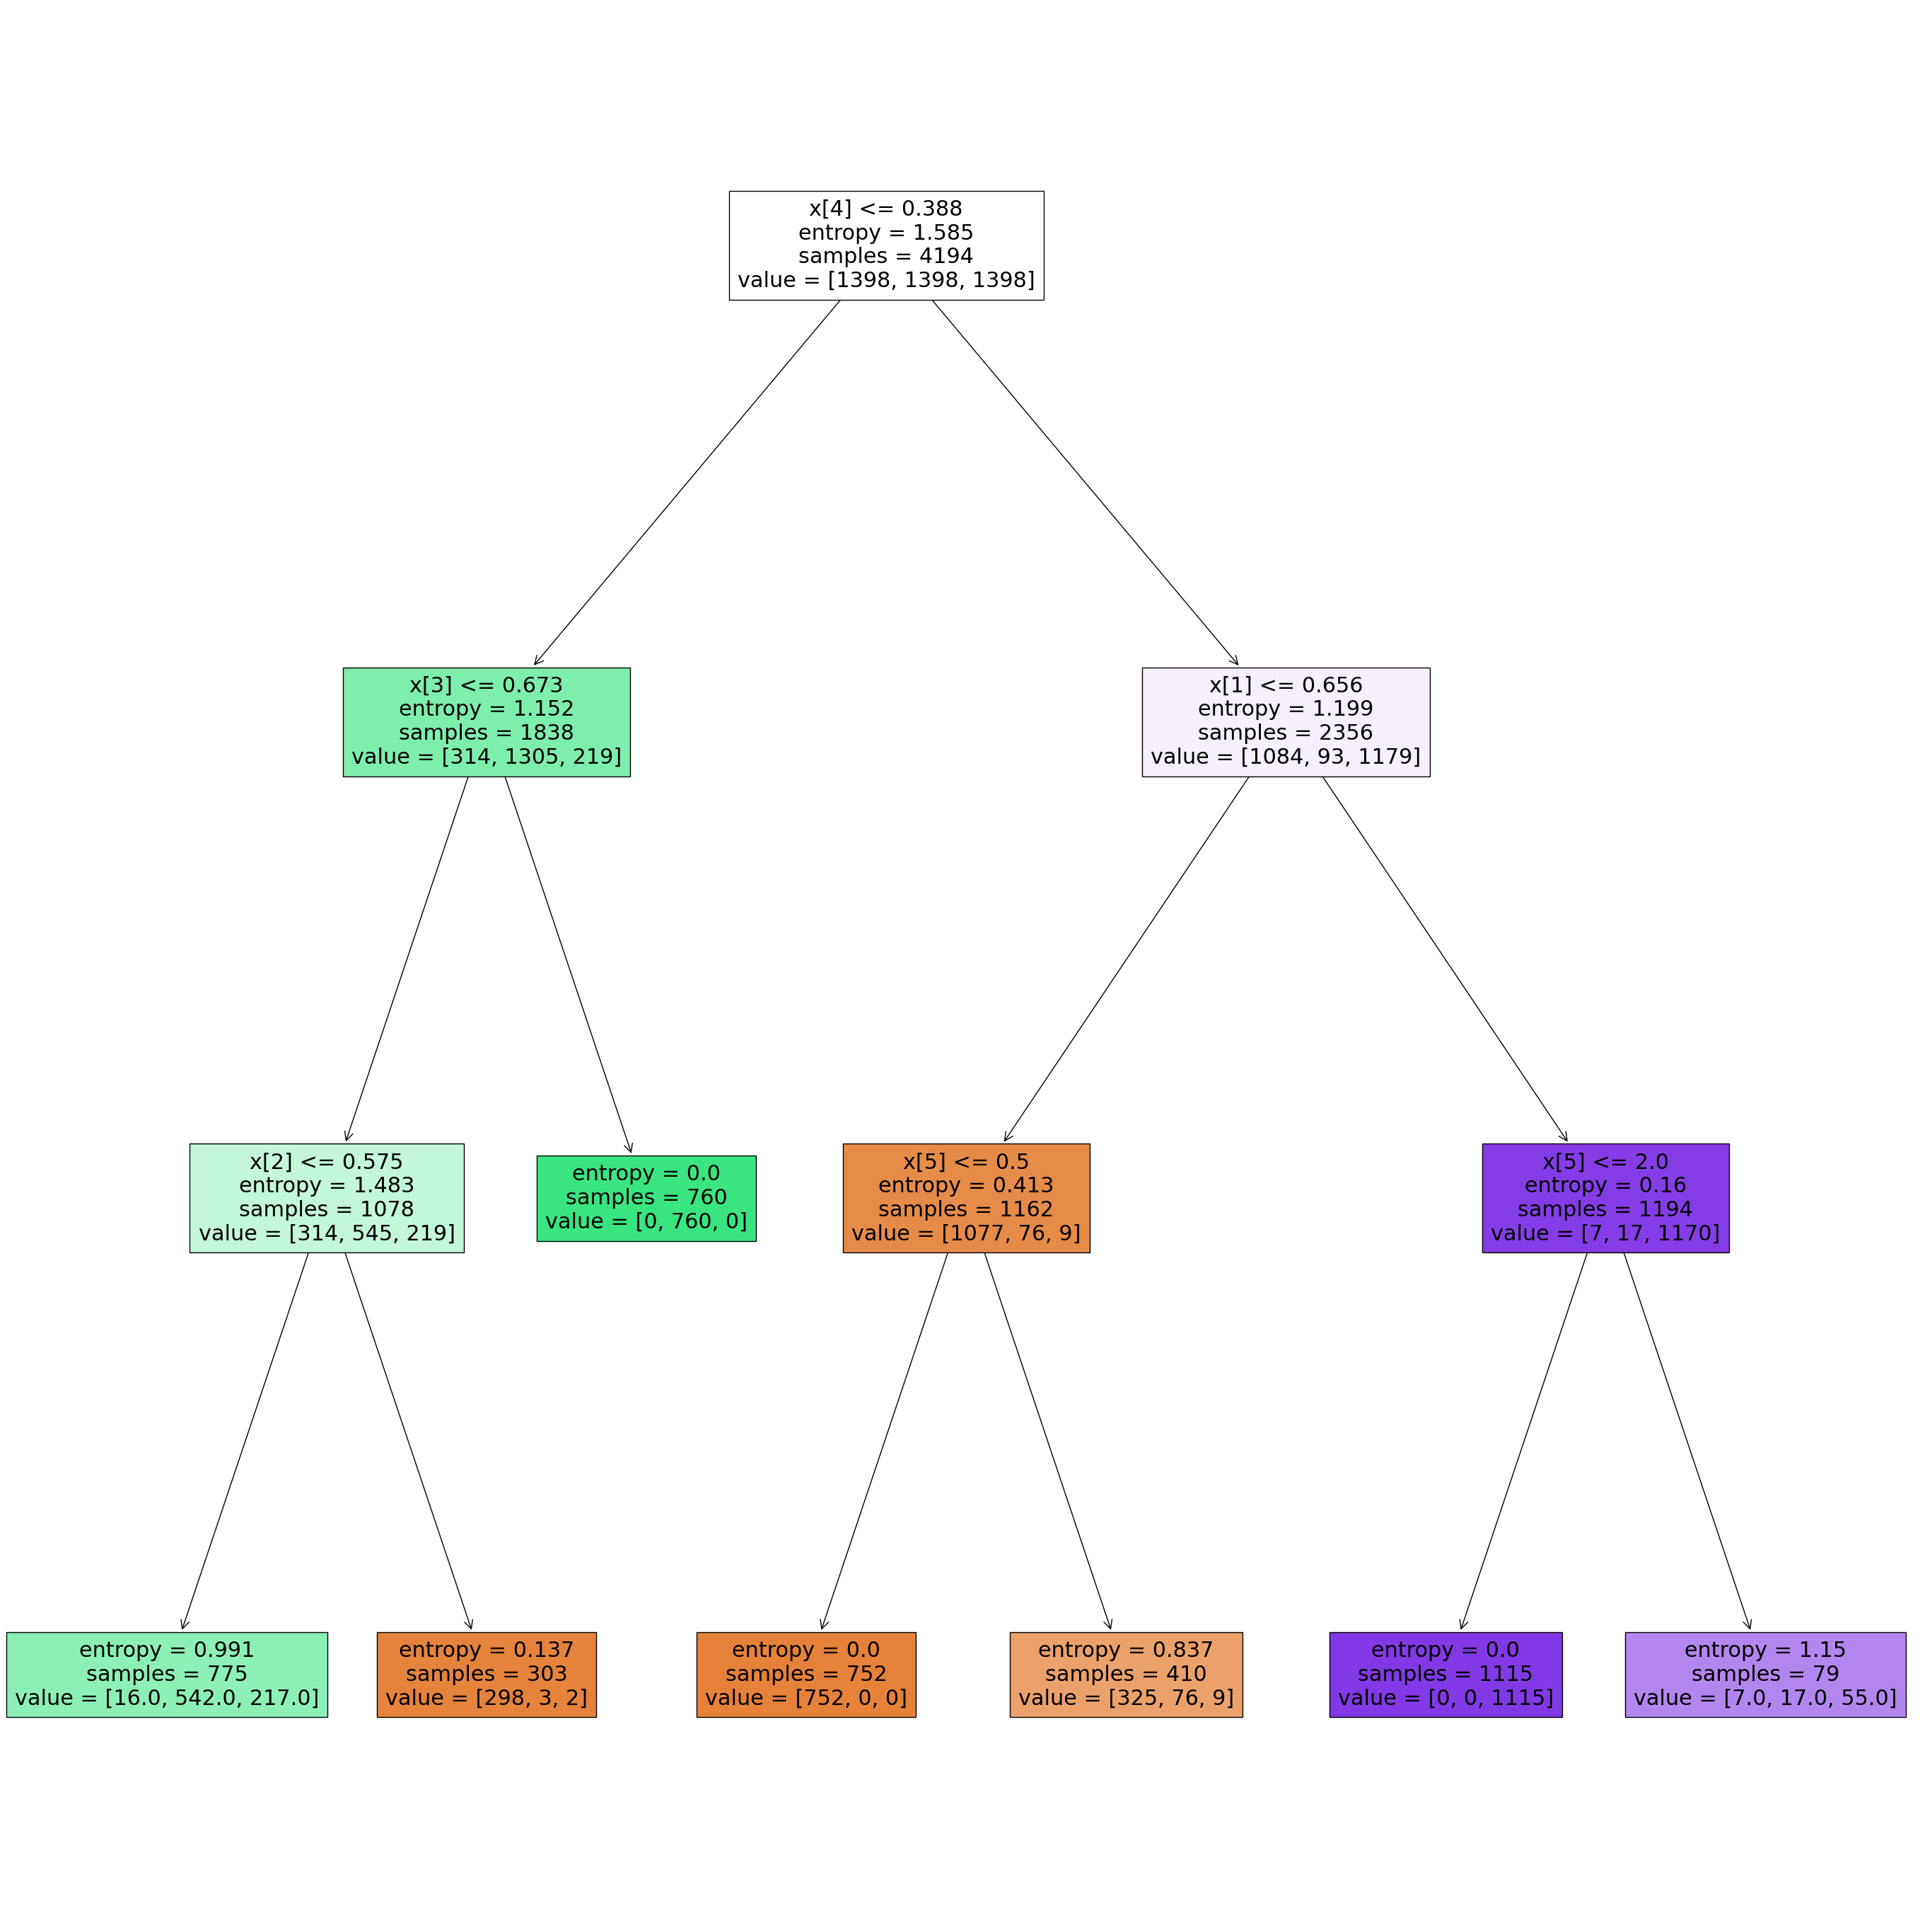

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Criteria options: 'gini', 'entropy'
criteria = 'entropy'  # Change this to 'entropy' for information gain criterion

# Initialize Decision Tree classifier with specified criteria
dt_classifier = DecisionTreeClassifier(criterion=criteria,max_depth=3,max_features=3)

# Train the classifier on the training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test) 



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

plt.figure(figsize=(35, 35))
plot_tree(dt_classifier,filled=True)
plt.show()